In [41]:
import pandas as pd

In [42]:
import numpy as np

In [43]:
import ast

In [68]:
import pprint

In [69]:
from functools import reduce

In [70]:
from matplotlib import pyplot as plt

In [71]:
from pandasql import sqldf

In [72]:
pysqldf = lambda q: sqldf(q, globals())

In [73]:
em_tweets_full = pd.read_json("C:/Users/vta/Downloads/elonmusk.json")

In [74]:
import tweepy
import json
import math
import glob
from tweepy import TweepError
from time import sleep

In [75]:
with open("C:/Users/vta/Downloads/api_keys.json") as f:
    keys = json.load(f)

In [76]:
auth = tweepy.OAuthHandler(keys['consumer_key'], keys['consumer_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth)

In [77]:
em_tweets_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7018 entries, 0 to 7017
Data columns (total 30 columns):
created_at                   7018 non-null datetime64[ns, UTC]
id                           7018 non-null int64
id_str                       7018 non-null int64
full_text                    7018 non-null object
truncated                    7018 non-null bool
display_text_range           7018 non-null object
entities                     7018 non-null object
source                       7018 non-null object
in_reply_to_status_id        5477 non-null float64
in_reply_to_status_id_str    5477 non-null float64
in_reply_to_user_id          5482 non-null float64
in_reply_to_user_id_str      5482 non-null float64
in_reply_to_screen_name      5482 non-null object
user                         7018 non-null object
geo                          0 non-null float64
coordinates                  0 non-null float64
place                        0 non-null float64
contributors                 0 non-n

In [78]:
# fixup some column data types
em_tweets_full['in_reply_to_status_id'] = em_tweets_full['in_reply_to_status_id'].astype(pd.Int64Dtype())
em_tweets_full['in_reply_to_status_id_str'] = em_tweets_full['in_reply_to_status_id_str'].astype(pd.Int64Dtype())
em_tweets_full['in_reply_to_user_id'] = em_tweets_full['in_reply_to_user_id'].astype(pd.Int64Dtype())
em_tweets_full['in_reply_to_user_id_str'] = em_tweets_full['in_reply_to_user_id_str'].astype(pd.Int64Dtype())
em_tweets_full['quoted_status_id'] = em_tweets_full['quoted_status_id'].astype(pd.Int64Dtype())
em_tweets_full['quoted_status_id_str'] = em_tweets_full['quoted_status_id_str'].astype(pd.Int64Dtype())

In [79]:
em_tweets_full

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2016-04-03 22:12:45+00:00,716750313471025152,716750313471025152,"@tapwin No, but we will need to build a factory in Europe to serve long-term regional demand as Fremont reaches max capacity.",False,"[0, 125]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'tapwin', 'name': 'TapWin™', 'id': 1543972213, 'id_str': '1543972213', 'indices': [0, 7]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",716743871607226368,716743871607226368,...,331,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-04-23 23:57:22+00:00,1120839110564782080,1120839110564782080,@flcnhvy @ItsMurphyOMG True,False,"[23, 27]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'flcnhvy', 'name': 'Viv 🐉', 'id': 1060180551544528897, 'id_str': '1060180551544528897', 'indices': [0, 8]}, {'screen_name': 'ItsMurphyOMG', 'name': 'Christian Murphy', 'id': 251827304, 'id_str': '251827304', 'indices': [9, 22]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",1120838992499544064,1120838992499544064,...,4779,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-26 20:33:31+00:00,1188191951654309888,1188191951654309888,Physics facts https://t.co/Z2a6PzokJx,False,"[0, 13]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1188191947392831488, 'id_str': '1188191947392831488', 'indices': [14, 37], 'media_url': 'http://pbs.twimg.com/media/EH1OR-VUUAATi-C.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EH1OR-VUUAATi-C.jpg', 'url': 'https://t.co/Z2a6PzokJx', 'display_url': 'pic.twitter.com/Z2a6PzokJx', 'expanded_url': 'https://twitter.com/elonmusk/status/1188191951654309888/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 118, 'h': 118, 'resize': 'crop'}, 'medium': {'w': 315, 'h': 118, 'resize': 'fit'}, 'large': {'w': 315, 'h': 118, 'resize': 'fit'}, 'small': {'w': 315, 'h': 118, 'resize': 'fit'}}, 'features': {'medium': {'faces': []}, 'orig': {'faces': []}, 'large': {'faces': []}, 'small': {'faces': []}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,NaN,...,172847,False,False,en,"{'media': [{'id': 1188191947392831488, 'id_str': '1188191947392831488', 'indices': [14, 37], 'media_url': 'http://pbs.twimg.com/media/EH1OR-VUUAATi-C.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EH1OR-VUUAATi-C.jpg', 'url': 'https://t.co/Z2a6PzokJx', 'display_url': 'pic.twitter.com/Z2a6PzokJx', 'expanded_url': 'https://twitter.com/elonmusk/status/1188191951654309888/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 118, 'h': 118, 'resize': 'crop'}, 'medium': {'w': 315, 'h': 118, 'resize': 'fit'}, 'large': {'w': 315, 'h': 118, 'resize': 'fit'}, 'small': {'w': 315, 'h': 118, 'resize': 'fit'}}, 'features': {'medium': {'faces': []}, 'orig': {'faces': []}, 'large': {'faces': []}, 'small': {'faces': []}}}]}",0.0,NaN,NaN,NaN,NaN
3,2019-02-01 02:22:46+00:00,1091159895284449280,1091159895284449280,@wonderofscience @Treebeard1671 @Erdayastronaut @keego73 Mostly true,False,"[57, 68]","{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'wonderofscience', 'name': 'Wonder of Science', 'id': 3101588527, 'id_str': '3101588527', 'indices': [0, 16]}, {'screen_name': 'Treebeard1671', 'name': 'Paul Lake', 'id': 173559023, 'id_str': '173559023', 'indices': [17, 31]}, {'screen_name': 'Erdayastronaut', 'name': 'Everyday Astronaut', 'id': 3167257102, 'id_str': '3167257102', 'indices': [32, 47]}, {'screen_name': 'Keego73', 'name': 'Matthew Keegan', 'id': 2264130601, 'id_str': '2264130601', 'indices': [48, 56]}], 'urls': []}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for 

In [80]:
em_tweets_full[['text_start', 'text_stop']] = pd.DataFrame(em_tweets_full.display_text_range.values.tolist(), index = em_tweets_full.index)

In [81]:
em_tweets_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7018 entries, 0 to 7017
Data columns (total 32 columns):
created_at                   7018 non-null datetime64[ns, UTC]
id                           7018 non-null int64
id_str                       7018 non-null int64
full_text                    7018 non-null object
truncated                    7018 non-null bool
display_text_range           7018 non-null object
entities                     7018 non-null object
source                       7018 non-null object
in_reply_to_status_id        5477 non-null Int64
in_reply_to_status_id_str    5477 non-null Int64
in_reply_to_user_id          5482 non-null Int64
in_reply_to_user_id_str      5482 non-null Int64
in_reply_to_screen_name      5482 non-null object
user                         7018 non-null object
geo                          0 non-null float64
coordinates                  0 non-null float64
place                        0 non-null float64
contributors                 0 non-null floa

In [82]:
# Get the quoted tweets (for retweet purposes)
# GETTING RETWEET INFO

# IDs that are just for quoted tweets that we want to get metadata for
ids = em_tweets_full[em_tweets_full.quoted_status.notna()].quoted_status_id.tolist()

all_data = []
start = 0
end = 100
limit = len(ids)
i = math.ceil(limit / 100)

for go in range(i):
    print('currently getting {} - {}'.format(start, end))
    sleep(6)  # needed to prevent hitting API rate limit
    id_batch = ids[start:end]
    start += 100
    end += 100
    tweets = api.statuses_lookup(id_batch, tweet_mode = 'extended')
    for tweet in tweets:
        all_data.append(dict(tweet._json))

currently getting 0 - 100
currently getting 100 - 200
currently getting 200 - 300
currently getting 300 - 400


In [83]:
quoted_tweets = pd.DataFrame(all_data)

In [84]:
quoted_tweets = quoted_tweets.rename(columns = {'id': 'tweet_id'})

In [85]:
quoted_tweets_user = quoted_tweets.user.apply(pd.Series).set_index(quoted_tweets.tweet_id)

In [86]:
# drop DICT fields - not convieniently applicable in pandasql
quoted_tweets = quoted_tweets.drop(['entities', 'extended_entities', 'user'], axis = 1)

In [87]:
quoted_tweets_user = quoted_tweets_user.iloc[:, 0:11].drop(['entities'], axis = 1)

In [88]:
# add @ to keep consistency with other data being extracted
quoted_tweets_user.screen_name = '@' + quoted_tweets_user.screen_name

In [89]:
quoted_tweets_user

,id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count
tweet_id,,,,,,,,,,
730376242147504128,2148233600,2148233600,Electrek.Co,@ElectrekCo,"Fremont, CA","Following the electric transportation industry and green ecosystem, Tesla, SolarCity and more.",http://t.co/HH7lVlzoT7,False,66907,17
1189601748018745344,3308585965,3308585965,🌚🌝,@liqualiz,,hey we should save the world mkayyy,None,False,236,684
1018319251428577280,34113439,34113439,Sierra Club,@SierraClub,,"Since 1892, the Sierra Club has been working to protect communities, wild places, and the planet itself",None,False,363409,5049
1061412788113825792,14171401,14171401,Maye Musk,@mayemusk,NYC/LA,#Dietitian #IMGmodels #Covergirl #Author “A Woman Makes A Plan” Orders in USA: https://t.co/VQm6m5aMoM Canada: https://t.co/jiFSvLn7kr #ItsGreatToBe71,https://t.co/jTc5tgduQX,False,74551,29
1113870913546670080,427089628,427089628,Lex Fridman,@lexfridman,"Cambridge, MA","Research in machine learning, autonomous vehicles and human-centered AI. Host of the Artificial Intelligence podcast.",https://t.co/tZnkXI9jxS,False,90378,1
...,...,...,...,...,...,...,...,...,...,...
1151857907497132032,381353568,381353568,LIL MEXICO 🇭🇺,@YeaIFukedYaMama,Mexico,,None,False,1982,946
1017206234439716864,2436389418,2436389418,SwiftOnSecurity,@SwiftOnSecurity,"Cyber, USA","Systems security, industrial safety, author https://t.co/LUiVUeE6gN + https://t.co/rzDVLlLn6y, write SciFi, sysadmin, & use Oxford commas. they/them/tay",https://t.co/8OV6y5BH0K,False,299020,8543
1014221135850827776,13298072,13298072,Tesla,@Tesla,,"Electric cars, giant batteries and solar",https://t.co/MxFwoUXrrG,False,4729903,74


In [90]:
# Set pandas display options
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 100)

em_tweet
table/dataframe as subset of em_tweets_full

In [91]:
em_tweet = em_tweets_full[['id', 'created_at', 'favorite_count', 'favorited', 'retweet_count', 'full_text', 'text_start', 'text_stop']]

In [92]:
print('start date:', em_tweet.created_at.min())
print('end date:', em_tweet.created_at.max())

start date: 2016-01-01 00:19:43+00:00
end date: 2019-12-24 23:58:36+00:00


In [93]:
em_tweet.dtypes

id                int64              
created_at        datetime64[ns, UTC]
favorite_count    int64              
favorited         bool               
retweet_count     int64              
full_text         object             
text_start        int64              
text_stop         int64              
dtype: object

In [94]:
# Extract just the text into a separate column (for analysis later):
just_the_text = []
for idx in em_tweet.index:
    tweet = em_tweet.loc[idx]['full_text']
    start = em_tweet.loc[idx]['text_start']
    stop = em_tweet.loc[idx]['text_stop']
    just_the_text.append(tweet[start:stop])
    
for i in range(len(just_the_text)):
    text = just_the_text[i]
    if len(text) >= 1 and text[0] == '@':
        first_space_idx = text.find(" ")
        just_the_text[i] = text[first_space_idx + 1:]
em_tweet['just_text'] = just_the_text

    

C:\Users\vta\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [95]:
display(pysqldf("SELECT count(*) FROM em_tweet"))
display(pysqldf("SELECT * FROM em_tweet").head(10))

,count(*)
0,7018


,id,created_at,favorite_count,favorited,retweet_count,full_text,text_start,text_stop,just_text
0,716750313471025152,2016-04-03 22:12:45.000000,331,0,103,"@tapwin No, but we will need to build a factory in Europe to serve long-term regional demand as Fremont reaches max capacity.",0,125,"No, but we will need to build a factory in Europe to serve long-term regional demand as Fremont reaches max capacity."
1,1120839110564782080,2019-04-23 23:57:22.000000,4779,0,40,@flcnhvy @ItsMurphyOMG True,23,27,True
2,1188191951654309888,2019-10-26 20:33:31.000000,172847,0,22475,Physics facts https://t.co/Z2a6PzokJx,0,13,Physics facts
3,1091159895284449280,2019-02-01 02:22:46.000000,807,0,18,@wonderofscience @Treebeard1671 @Erdayastronaut @keego73 Mostly true,57,68,Mostly true
4,759413050961121280,2016-07-30 15:39:15.000000,215,0,8,"@voguemaster @Jalopnik not bad, I like those suggestions",23,56,"not bad, I like those suggestions"
5,1131671141624365056,2019-05-23 21:20:00.000000,933,0,33,@Erdayastronaut @JaneidyEve @13ericralph31 @SPEXcast @bluemoondance74 @Orion_Sword @Some1gee @SpaceX ~2.8m,101,106,~2.8m
6,1056012930423160832,2018-10-27 02:41:17.000000,1170,0,37,"@pjj_knowles @yames51 @DigitalDunzey No, but I will",37,51,"No, but I will"
7,1008859105883066368,2018-06-18 23:48:49.000000,1761,0,210,@amendlocke Your union brothers https://t.co/DsGvlscvc6,12,55,Your union brothers https://t.co/DsGvlscvc6
8,755140683112017920,2016-07-18 20:42:23.000000,10399,0,3380,Landing https://t.co/dRWGyyTtCH,0,7,Landing
9,1184965261624922112,2019-10-17 22:51:48.000000,142148,0,7186,Going offline for a few days,0,28,Going offline for a few days


In [96]:
# Additional tables to look at some stats
tweet_freq_hour = pysqldf("SELECT strftime('%H', created_at) AS hour, count(*) as cnt FROM em_tweet GROUP BY hour;")
tweet_freq_month = pysqldf("SELECT strftime('%m', created_at) as month, count(*) as cnt FROM em_tweet GROUP BY month;")
tweet_freq_year = pysqldf("SELECT strftime('%Y', created_at) AS year, count(*) AS cnt FROM em_tweet GROUP BY year;")


DESCRIPTIVE STATS

In [97]:
def descriptive_stats(table_name, table_col):
    print("=========================================")
    print(f"Table Name: {table_name}")
    print(f"Table Col: {table_col}")
    print("=========================================")
    print("")

    # Count
    count = pysqldf(f"""SELECT "COUNT" as Stat, COUNT({table_col}) AS Value FROM {table_name};""")
    
    # Mean
    mean = pysqldf(f"""SELECT "MEAN" as Stat, CAST(AVG({table_col}) AS int) AS Value FROM {table_name};""")
    
    # Median
    median = pysqldf(f"""SELECT "MEDIAN" AS Stat, {table_col} AS Value FROM {table_name} 
                    ORDER BY {table_col} 
                    LIMIT 1 
                    OFFSET (SELECT COUNT(*) FROM {table_name}) / 2;""")
    
    # Mode
    mode = pysqldf(f"""SELECT "MODE" AS Stat, {table_col} AS Value, COUNT(*) AS count
                   FROM {table_name}
                   GROUP BY {table_col}
                   ORDER BY count DESC
                   LIMIT 1;""")
    
    
    # Min and Max
    min = pysqldf(f"""SELECT "MIN" AS Stat, MIN({table_col}) AS Value
                 FROM {table_name};""")
    
    max = pysqldf(f"""SELECT "MAX" AS Stat, MAX({table_col}) AS Value
                 FROM {table_name};""")
    
    display(pd.concat([count, mean, median, min, max]).set_index("Stat"))
    display(mode.set_index("Stat"))
    print("")
    
    


    

In [98]:
descriptive_stats('em_tweet', 'favorite_count')

Table Name: em_tweet
Table Col: favorite_count



,Value
Stat,
COUNT,7018
MEAN,17272
MEDIAN,2196
MIN,58
MAX,1289349


,Value,count
Stat,,
MODE,1042,8


In [99]:
# For 25-50-75-100 range in SQL

# Using CTEs(Temp Tables) create a percentile breakdown (given parameter entered), then select last_value of the percentile
# breakdown

def get_iqrs(table_name, table_col):
    query = f"""WITH percent_tbl AS (
                SELECT {table_col}, ntile(4) OVER(ORDER BY {table_col}) percent
                FROM {table_name}
                ),
                p_25 AS (SELECT (percent * 0.25) AS pct,
                        LAST_VALUE({table_col}) OVER
                        (PARTITION BY percent) AS last_val
                        FROM percent_tbl
                        WHERE percent = 1
                        LIMIT 1),
                p_50 AS (SELECT (percent * 0.25) AS pct,
                        LAST_VALUE({table_col}) OVER
                        (PARTITION BY percent) AS last_val
                        FROM percent_tbl
                        WHERE percent = 2
                        LIMIT 1),
                p_75 AS (SELECT (percent * 0.25) AS pct,
                        LAST_VALUE({table_col}) OVER
                        (PARTITION BY percent) AS last_val
                        FROM percent_tbl
                        WHERE percent = 3
                        LIMIT 1),
                p_100 AS (SELECT (percent * 0.25) AS pct,
                        LAST_VALUE({table_col}) OVER
                        (PARTITION BY percent) AS last_val
                        FROM percent_tbl
                        WHERE percent = 4
                        LIMIT 1)
                SELECT * FROM p_25 UNION
                SELECT * FROM p_50 UNION
                SELECT * FROM p_75 UNION
                SELECT * FROM p_100;"""
    iqrs = pysqldf(query)
    return display(pd.DataFrame(iqrs))

    

In [100]:
get_iqrs('em_tweet', 'favorite_count')

,pct,last_val
0,0.25,854
1,0.50,2196
2,0.75,12224
3,1.00,1289349


In [101]:
tweet_freq_year

,year,cnt
0,2016,753
1,2017,1161
2,2018,2288
3,2019,2816


In [102]:
descriptive_stats('tweet_freq_year', 'tweet_freq_year.cnt')
get_iqrs('tweet_freq_year', 'cnt')
descriptive_stats('tweet_freq_month', 'tweet_freq_month.cnt')
get_iqrs('tweet_freq_month', 'cnt')
descriptive_stats('tweet_freq_hour', 'tweet_freq_hour.cnt')
get_iqrs('tweet_freq_hour', 'cnt')

for col in em_tweet.columns:
    descriptive_stats('em_tweet', col)
    get_iqrs('em_tweet', col)




Table Name: tweet_freq_year
Table Col: tweet_freq_year.cnt



,Value
Stat,
COUNT,4
MEAN,1754
MEDIAN,2288
MIN,753
MAX,2816


,Value,count
Stat,,
MODE,2816,1


,pct,last_val
0,0.25,753
1,0.50,1161
2,0.75,2288
3,1.00,2816


Table Name: tweet_freq_month
Table Col: tweet_freq_month.cnt



,Value
Stat,
COUNT,12
MEAN,584
MEDIAN,541
MIN,350
MAX,834


,Value,count
Stat,,
MODE,834,1


,pct,last_val
0,0.25,453
1,0.50,524
2,0.75,633
3,1.00,834


Table Name: tweet_freq_hour
Table Col: tweet_freq_hour.cnt



,Value
Stat,
COUNT,24
MEAN,292
MEDIAN,321
MIN,40
MAX,530


,Value,count
Stat,,
MODE,530,1


,pct,last_val
0,0.25,151
1,0.50,316
2,0.75,379
3,1.00,530


Table Name: em_tweet
Table Col: id



,Value
Stat,
COUNT,7018
MEAN,1017332694042857600
MEDIAN,1042516607166103552
MIN,682717803166695425
MAX,1209624448686608384


,Value,count
Stat,,
MODE,1209624448686608384,1


,pct,last_val
0,0.25,920482298327216128
1,0.50,1042516607166103552
2,0.75,1126243218742374400
3,1.00,1209624448686608384


Table Name: em_tweet
Table Col: created_at



,Value
Stat,
COUNT,7018
MEAN,2018
MEDIAN,2018-09-19 20:51:42.000000
MIN,2016-01-01 00:19:43.000000
MAX,2019-12-24 23:58:36.000000


,Value,count
Stat,,
MODE,2018-05-25 18:23:42.000000,2


,pct,last_val
0,0.25,2017-10-18 02:50:56.000000
1,0.50,2018-09-19 20:51:42.000000
2,0.75,2019-05-08 21:51:22.000000
3,1.00,2019-12-24 23:58:36.000000


Table Name: em_tweet
Table Col: favorite_count



,Value
Stat,
COUNT,7018
MEAN,17272
MEDIAN,2196
MIN,58
MAX,1289349


,Value,count
Stat,,
MODE,1042,8


,pct,last_val
0,0.25,854
1,0.50,2196
2,0.75,12224
3,1.00,1289349


Table Name: em_tweet
Table Col: favorited



,Value
Stat,
COUNT,7018
MEAN,0
MEDIAN,0
MIN,0
MAX,0


,Value,count
Stat,,
MODE,0,7018


,pct,last_val
0,0.25,0
1,0.50,0
2,0.75,0
3,1.00,0


Table Name: em_tweet
Table Col: retweet_count



,Value
Stat,
COUNT,7018
MEAN,2241
MEDIAN,119
MIN,0
MAX,401681


,Value,count
Stat,,
MODE,29,74


,pct,last_val
0,0.25,38
1,0.50,119
2,0.75,1065
3,1.00,401681


Table Name: em_tweet
Table Col: full_text



,Value
Stat,
COUNT,7018
MEAN,1
MEDIAN,@hamids @Tesla Excellent analysis
MIN,"""If one day, my words are against science, choose science.""\nMustafa Kemal Atatürk"
MAX,🧲 is relativistic side effect of ⚡️


,Value,count
Stat,,
MODE,@teslaownersSV Yes,3


,pct,last_val
0,0.25,@PatrickWStanley @LivingTesla @Tesla Yes
1,0.50,@hamids @Tesla Excellent analysis
2,0.75,"Better video coming soon, but it would look a bit like this: https://t.co/C0iJPi8b4U"
3,1.00,🧲 is relativistic side effect of ⚡️


Table Name: em_tweet
Table Col: text_start



,Value
Stat,
COUNT,7018
MEAN,16
MEDIAN,13
MIN,0
MAX,238


,Value,count
Stat,,
MODE,0,2110


,pct,last_val
0,0.25,0
1,0.50,13
2,0.75,24
3,1.00,238


Table Name: em_tweet
Table Col: text_stop



,Value
Stat,
COUNT,7018
MEAN,88
MEDIAN,70
MIN,0
MAX,399


,Value,count
Stat,,
MODE,23,97


,pct,last_val
0,0.25,35
1,0.50,70
2,0.75,127
3,1.00,399


Table Name: em_tweet
Table Col: just_text



,Value
Stat,
COUNT,7018
MEAN,3
MEDIAN,Occasional existential dread is inevitable if you think at all about the future
MIN,
MAX,🧲 is relativistic side effect of ⚡️


,Value,count
Stat,,
MODE,Yes,158


,pct,last_val
0,0.25,Good interview by @lexfridman
1,0.50,Occasional existential dread is inevitable if you think at all about the future
2,0.75,Thus *reducing* existing road traffic
3,1.00,🧲 is relativistic side effect of ⚡️


Create additional tables (aka DataFrames that we will access as tables)

tweet_user table

In [103]:
# Table that holds info about each user and the tweets they were part of
# (eg: public, mention, retweet)
public_tweets = []
for idx in em_tweet.index:
    tweet = em_tweet.loc[idx]['full_text']
    if tweet[:2] == '.@':
        # It's a public tweet on purpose
        parts = tweet.split()
        public_tweets.append([parts[0][1:], "public", em_tweet.loc[idx]['id']])
        
who_he_mentions = []
for idx in em_tweet.index:
    tweet = em_tweet.loc[idx]['full_text']
    if tweet[:1] == '@':
        # It's a reply/mention
        parts = tweet.split()
        for i in range(len(parts)):
            if parts[i][0] == '@':
                who_he_mentions.append([parts[i], "mention", em_tweet.loc[idx]['id']])

# who_he_retweets = []
# for idx in em_tweet.index:
    # tweet = em_tweet.loc[idx]['full_text']
    # if tweet[:2] == 'RT':
        # splits = tweet.split(": ")
        # rt, who = splits[0].split(" ")
        # who_he_retweets.append([who, "retweet", em_tweet.loc[idx]['id']])
# print(who_he_retweets)
who_he_retweets = pysqldf("""SELECT screen_name, 'retweet', tweet_id FROM quoted_tweets_user""").values.tolist()

combined = public_tweets + who_he_mentions + who_he_retweets
tweet_user = pd.DataFrame(combined, columns = ['username', 'tweet_type', 'tweet_id'])

In [104]:
# Example ... Tweets that have the highest number of users mentioned
display(pysqldf("""SELECT tweet_id, tweet_type, COUNT(username) AS no_users_mentioned 
                FROM tweet_user 
                GROUP BY tweet_id, tweet_type
                ORDER BY no_users_mentioned DESC""").head())
display(pysqldf("""SELECT *
                FROM em_tweet
                WHERE id = 1205676667705757696"""))

,tweet_id,tweet_type,no_users_mentioned
0,1205676667705757696,mention,16
1,1205622140852002816,mention,15
2,1098656849740451840,mention,14
3,1098653939141009408,mention,13
4,1098654054320750592,mention,13


,id,created_at,favorite_count,favorited,retweet_count,full_text,text_start,text_stop,just_text
0,1205676667705757696,2019-12-14 02:31:32.000000,6746,0,701,@bluemoondance74 @ThugsAndMiracle @tfspeakcies @DearHistorians @DeepintoHistory @HellenisticPod @TrueConsPod @IWBpodcast @Coffincast @CacheHistory @AgeofVictoria @ForYourRefPod @WWIIPodcast @namelessdeadpod @ZombieFishbowl @AgeofNapoleon Raptor is making great progress! Just finished an engineering review with SpaceX Propulsion. Engine SN 17 is about to ship to McGregor with some holiday style 🎄😀 https://t.co/3JNIyxY9H0,238,399,Raptor is making great progress! Just finished an engineering review with SpaceX Propulsion. Engine SN 17 is about to ship to McGregor with some holiday style 🎄😀


user table

In [105]:
# Get users with their public counts
public_totals = pysqldf("""SELECT username, tweet_type, COUNT(*) AS public_cnt
                FROM tweet_user
                WHERE tweet_type = 'public'
                GROUP BY 1, 2;""")
public_totals_df = public_totals[['username', 'public_cnt']]

# Get users with their mention counts
mention_totals = pysqldf("""SELECT username, tweet_type, COUNT(*) AS mention_cnt
                        FROM tweet_user
                        WHERE tweet_type = 'mention'
                        GROUP BY 1,2;
                        """)
mention_totals_df = mention_totals[['username', 'mention_cnt']]


# Get users with their retweet counts
retweet_totals = pysqldf("""SELECT username, tweet_type, COUNT(*) AS retweet_cnt
                        FROM tweet_user
                        WHERE tweet_type = 'retweet'
                        GROUP BY 1,2;""")
retweet_totals_df = retweet_totals[['username', 'retweet_cnt']]
dataframes = [public_totals_df, mention_totals_df, retweet_totals_df]
user = reduce(lambda left, right: pd.merge(left, right, on = ['username'], how = 'outer'), dataframes)

In [106]:
print("PUBLIC")
display(pysqldf("""SELECT * FROM user
                WHERE public_cnt IS NOT NULL
                ORDER BY public_cnt DESC;""").head(15))

print("MENTION")
display(pysqldf("""SELECT * FROM user
                WHERE mention_cnt IS NOT NULL
                ORDER BY mention_cnt DESC;""").head(15))
# Tesla and SpaceX (as hypothesis expected), what about @Erdayastronaut? Notice it doesnt have a lot of retweets

print("RETWEET")
display(pysqldf("""SELECT * FROM user
                WHERE retweet_cnt IS NOT NULL
                ORDER BY retweet_cnt DESC;""").head(15))
# Tesla and SpaceX, what about Teslarati?

print("MENTION AND RETWEET")
display(pysqldf("""SELECT username, mention_cnt, retweet_cnt FROM user
                WHERE mention_cnt IS NOT NULL
                AND retweet_cnt IS NOT NULL
                ORDER BY retweet_cnt DESC;""").head(10))

print("SUMMARY")
display(pysqldf("""SELECT * FROM user
                ORDER BY public_cnt DESC, mention_cnt DESC, retweet_cnt DESC;"""))

# Notice that @boringcompany is top => Analyse EM's connection with this user

PUBLIC


,username,public_cnt,mention_cnt,retweet_cnt
0,@NHTSAgov,1.0,3.0,NaN
1,@TheOnion,1.0,23.0,1.0
2,@WidespreadPanic,1.0,NaN,NaN
3,@boringcompany,1.0,29.0,5.0
4,@cgpgrey,1.0,9.0,NaN
5,@curtismcauliff,1.0,NaN,NaN
6,@defcon.,1.0,NaN,NaN
7,@mcannonbrookes,1.0,9.0,NaN


MENTION


,username,public_cnt,mention_cnt,retweet_cnt
0,@Tesla,NaN,477.0,21.0
1,@Erdayastronaut,NaN,293.0,1.0
2,@SpaceX,NaN,216.0,19.0
3,@flcnhvy,NaN,175.0,NaN
4,@FredericLambert,NaN,110.0,NaN
5,@Teslarati,NaN,107.0,9.0
6,@annerajb,NaN,88.0,NaN
7,@teslaownersSV,NaN,85.0,1.0
8,@DMC_Ryan,NaN,67.0,1.0
9,@cleantechnica,NaN,60.0,9.0


RETWEET


,username,public_cnt,mention_cnt,retweet_cnt
0,@Tesla,NaN,477.0,21.0
1,@SpaceX,NaN,216.0,19.0
2,@Teslarati,NaN,107.0,9.0
3,@cleantechnica,NaN,60.0,9.0
4,@elonmusk,NaN,5.0,6.0
5,@boringcompany,1.0,29.0,5.0
6,@ElectrekCo,NaN,33.0,4.0
7,@NASA,NaN,47.0,4.0
8,@InsideEVs,NaN,18.0,3.0
9,@sciam,NaN,3.0,3.0


MENTION AND RETWEET


,username,mention_cnt,retweet_cnt
0,@Tesla,477.0,21.0
1,@SpaceX,216.0,19.0
2,@Teslarati,107.0,9.0
3,@cleantechnica,60.0,9.0
4,@elonmusk,5.0,6.0
5,@boringcompany,29.0,5.0
6,@ElectrekCo,33.0,4.0
7,@NASA,47.0,4.0
8,@InsideEVs,18.0,3.0
9,@sciam,3.0,3.0


SUMMARY


,username,public_cnt,mention_cnt,retweet_cnt
0,@boringcompany,1.0,29.0,5.0
1,@TheOnion,1.0,23.0,1.0
2,@cgpgrey,1.0,9.0,NaN
3,@mcannonbrookes,1.0,9.0,NaN
4,@NHTSAgov,1.0,3.0,NaN
...,...,...,...,...
3604,@ruminehl,NaN,NaN,1.0
3605,@safinamastura,NaN,NaN,1.0
3606,@samscho,NaN,NaN,1.0
3607,@sundeep,NaN,NaN,1.0


Pandas Method to get the same results as above

In [107]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [108]:
em_tweet.describe()

,id,favorite_count,retweet_count,text_start,text_stop
count,7018.00,7018.00,7018.00,7018.00,7018.00
mean,1017332694042857600.00,17272.78,2241.71,16.69,88.26
std,135471713505411904.00,50712.10,10149.03,19.48,67.53
min,682717803166695424.00,58.00,0.00,0.00,0.00
25%,920491775814327296.00,854.00,38.00,0.00,35.00
50%,1042516106410252288.00,2195.50,119.00,13.00,70.00
75%,1126242398589218816.00,12223.25,1065.00,24.00,127.00
max,1209624448686608384.00,1289349.00,401681.00,238.00,399.00


mean 1754.5
median 1724.5
std 960.3209532928735
min 753
max 2816


,cnt
count,4.00
mean,1754.50
std,960.32
min,753.00
25%,1059.00
50%,1724.50
75%,2420.00
max,2816.00


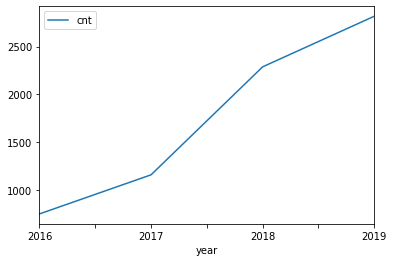

In [109]:
print("mean", tweet_freq_year.cnt.mean())
print("median", tweet_freq_year.cnt.median())
print("std", tweet_freq_year.cnt.std())
print("min", tweet_freq_year.cnt.min())
print("max", tweet_freq_year.cnt.max())

display(tweet_freq_year.describe())
tweet_freq_year.plot('year', 'cnt')

In [110]:
# Some useful pd functions:
pd.read_csv
pd.read_json
pd.to_excel
pd.DataFrame
pdseries.to_list
pd.series.values

pd.concat / pd.merge
pd.DataFrame.apply(lambda x: ...)

AttributeError: module 'pandas' has no attribute 'to_excel'

VISUALISATIONS

In [111]:
plt.style.use("fivethirtyeight")

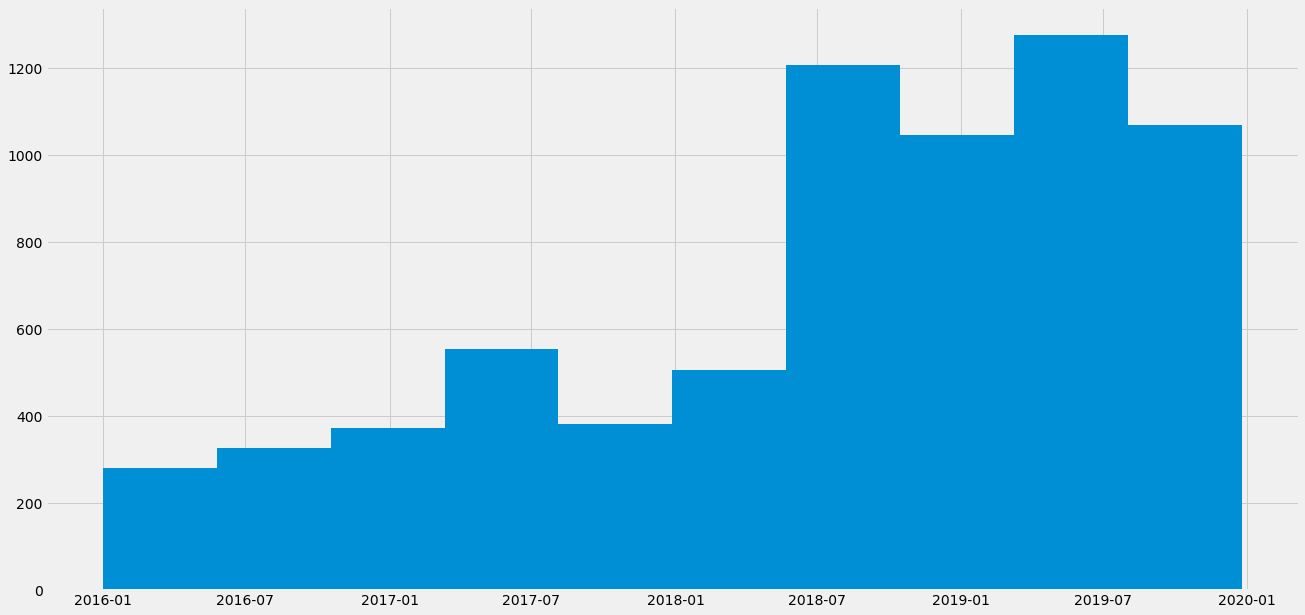

In [112]:
plt.figure(figsize=(20, 10)) # create a figure object and modify its size
em_tweet.created_at.hist() # Shows distribution of the number of tweets EM makes over time

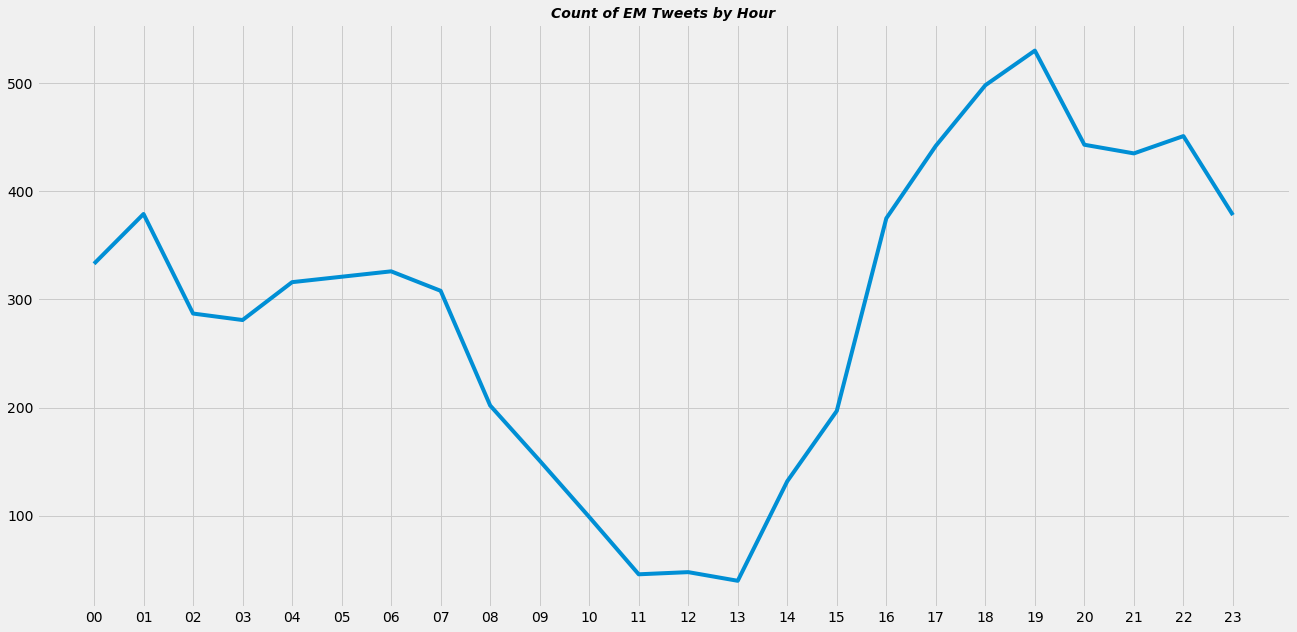

In [113]:
plt.figure(figsize = (20, 10))
plt.plot(tweet_freq_hour.hour, tweet_freq_hour.cnt)
plt.title("Count of EM Tweets by Hour", fontname = "DejaVu Sans", fontsize = 14, fontstyle = 'italic', fontweight = 'bold')
plt.show()

# Create visualisation of EM Tweets count by each hour of the day
# Tweets a bit after midnight, not so much during lunch, and a lot in the evening


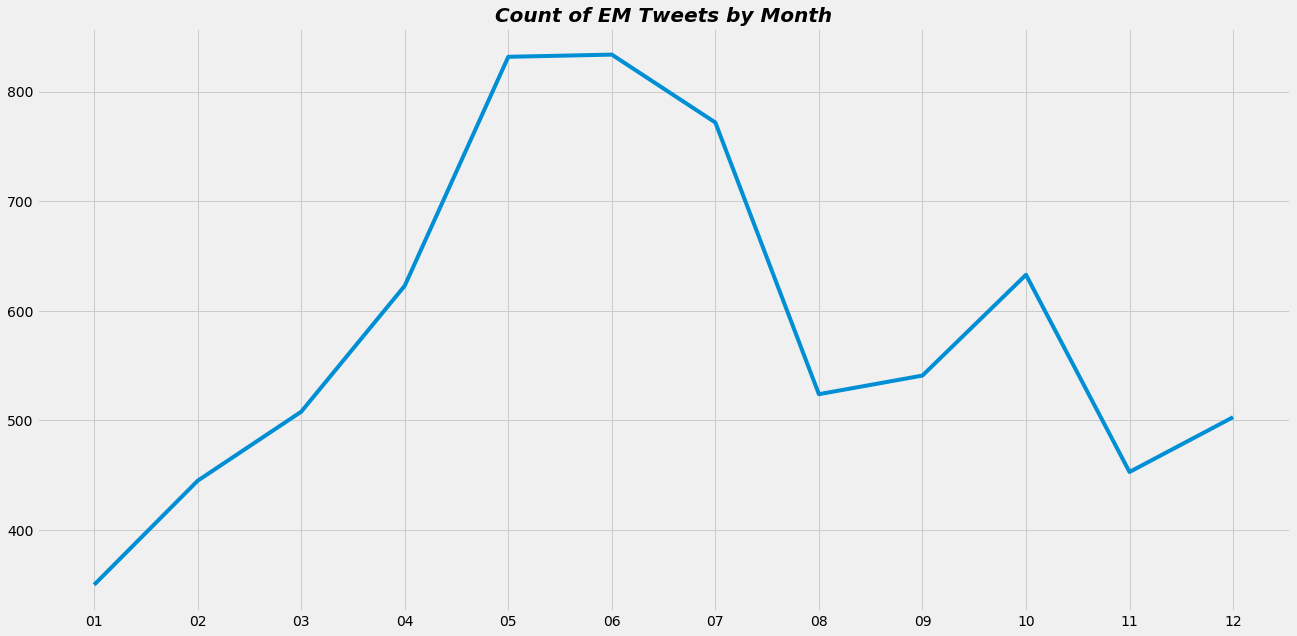

In [114]:
# Create visualisation of EM Tweets count by each month of the year
plt.figure(figsize = (20, 10))
plt.plot(tweet_freq_month.month, tweet_freq_month.cnt)
plt.title("Count of EM Tweets by Month", fontname = 'DejaVu Sans', fontsize = 20, fontstyle = 'italic', fontweight = 'bold')
plt.show()

# The number of tweets go up as we approach the summer months, peaking in May, June (could possibly be linked to releases
# of products), goes down and perks up a little bit again in October (winter releases?)


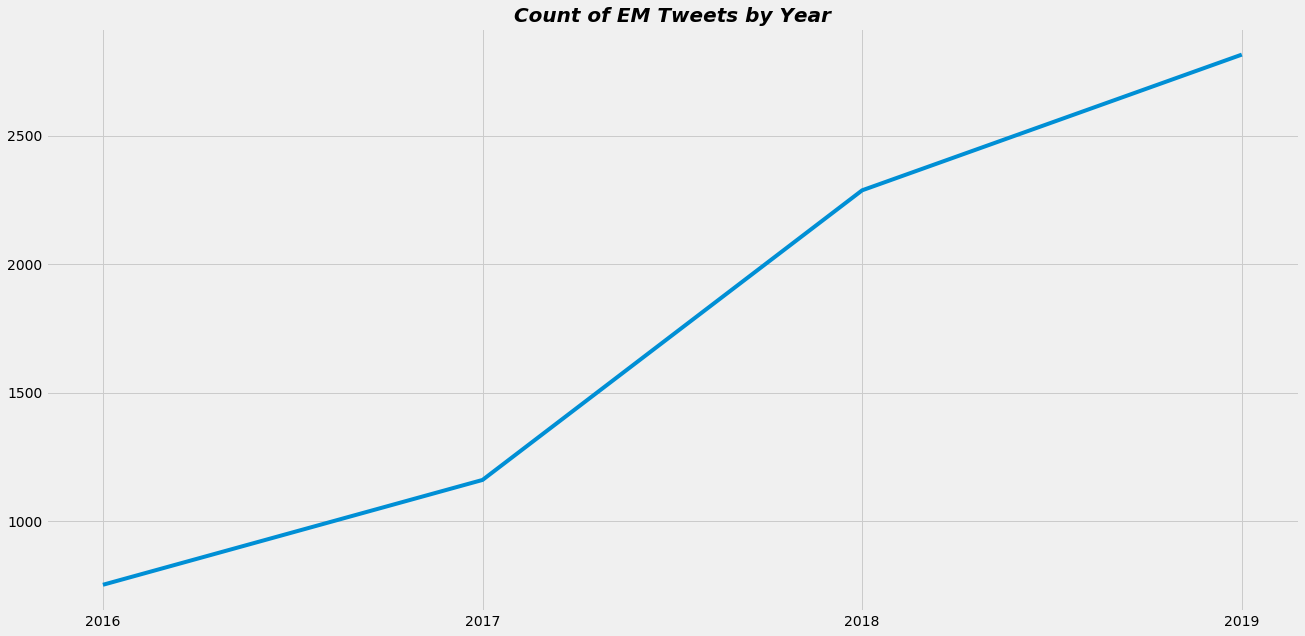

In [115]:
# Create visualisation by EM Tweet counts by each year (from 2016 - 2019)
plt.figure(figsize = (20, 10))
plt.plot(tweet_freq_year.year, tweet_freq_year.cnt)
plt.title("Count of EM Tweets by Year", fontname = 'DejaVu Sans', fontsize = 20, fontstyle = 'italic', fontweight = 'bold')
plt.show()

# As Tesla and SpaceX continues to grow in revenue over time and pumps out more and more products, EM Tweets seem to 
# get higher by the years



In [116]:
tweet_freq_hour.to_csv('tweet_freq_hour.csv')

In [117]:
tweet_user.columns

Index(['username', 'tweet_type', 'tweet_id'], dtype='object')

In [118]:
erday_tweets = pysqldf("""SELECT *
                FROM em_tweet AS em
                JOIN tweet_user AS tu
                ON em.id = tu.tweet_id
                WHERE tu.username = '@Erdayastronaut'""")

spacex_tweets = pysqldf("""SELECT *
                FROM em_tweet AS em
                JOIN tweet_user AS tu
                ON em.id = tu.tweet_id
                WHERE tu.username = '@SpaceX'""")

teslarati_tweets = pysqldf("""SELECT *
                FROM em_tweet AS em
                JOIN tweet_user AS tu
                ON em.id = tu.tweet_id
                WHERE tu.username = '@Teslarati'""")

In [119]:
# Prep created_at column
erday_tweets.dtypes # gives object datatype for created_at => Change to datetime
erday_tweets['created_at'] = pd.to_datetime(erday_tweets['created_at'])
spacex_tweets['created_at'] = pd.to_datetime(spacex_tweets['created_at'])
teslarati_tweets['created_at'] = pd.to_datetime(teslarati_tweets['created_at'])


(array([736785., 736876., 736968., 737060., 737150., 737241., 737333.,
        737425.]), <a list of 8 Text xticklabel objects>)

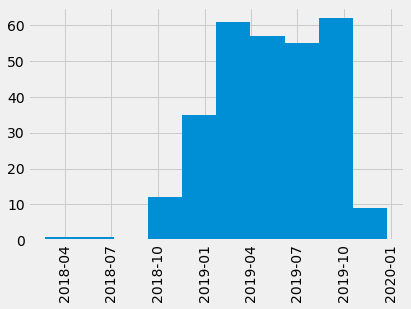

In [120]:
erday_tweets.created_at.hist()
plt.xticks(rotation='vertical')

# In 2018-10, Everyday Astronaut did an interview with Elon Musk

(array([735964., 736146., 736330., 736511., 736695., 736876., 737060.,
        737241., 737425.]), <a list of 9 Text xticklabel objects>)

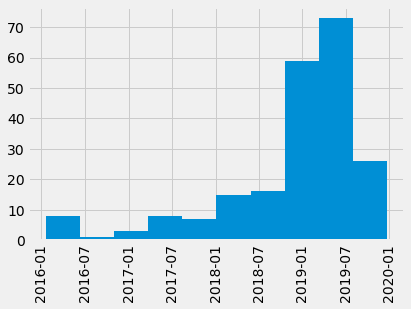

In [121]:
spacex_tweets.created_at.hist()
plt.xticks(rotation = 'vertical')
# Consistent across time, peaking in first half of 2019 => SpaceX launching Mars spaceship which gathered a lot of
# media attention

(array([736330., 736450., 736573., 736695., 736815., 736938., 737060.,
        737180., 737303., 737425.]), <a list of 10 Text xticklabel objects>)

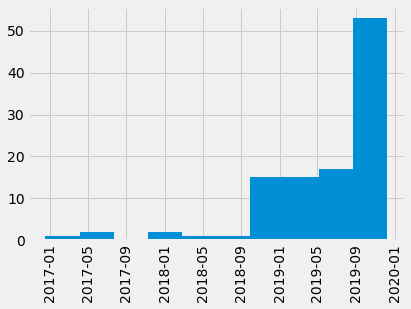

In [122]:
teslarati_tweets.created_at.hist()
plt.xticks(rotation = 'vertical')
# Newly launch, thus the recent booming of tweets and mentions
# Otherwise pretty consistent over time, just like SpaceX

In [123]:
# Overall, Everyday Astronaut seems like an one-off engagement more like long-standing engagement over time,
# in contrast to SpaceX and Teslarati, both of which are companies EM heavily associates with

In [124]:
# The high amount of public tweets of @boringcompany makes sense, as this is the hyperloop/loop company
# that's a subsidiary of @SpaceX and (as of 2018) EM owned a 90% equity interest

# Frequency Analysis (TF-IDF for Word Frequency/Theme Analysis

In [125]:
pysqldf("SELECT just_text FROM em_tweet")

,just_text
0,"No, but we will need to build a factory in Europe to serve long-term regional demand as Fremont reaches max capacity."
1,True
2,Physics facts
3,Mostly true
4,"not bad, I like those suggestions"
...,...
7013,https://t.co/WavNr0ZtDn
7014,The hardest joke ever
7015,Definitely
7016,"Personally, I think the universe looks great for 12 billion years, let alone 13.8"


Take into account stop words ('a', 'the', 'and', 'is', etc.)

In [126]:
pysqldf("SELECT replace(replace(replace(replace((replace((replace(lower(just_text), ' a ', ' ')), ' is ', ' ')), ' it ', ' '), ' an ', ' '), ' the ', ' '), ' and ', ' ') FROM em_tweet")

,"replace(replace(replace(replace((replace((replace(lower(just_text), ' a ', ' ')), ' is ', ' ')), ' it ', ' '), ' an ', ' '), ' the ', ' '), ' and ', ' ')"
0,"no, but we will need to build factory in europe to serve long-term regional demand as fremont reaches max capacity."
1,true
2,physics facts
3,mostly true
4,"not bad, i like those suggestions"
...,...
7013,https://t.co/wavnr0ztdn
7014,the hardest joke ever
7015,definitely
7016,"personally, i think universe looks great for 12 billion years, let alone 13.8"


In [127]:
stopwords = ['i',
'me',
'my',
'myself',
'we',
'our',
'ours',
'ourselves',
'you',
'your',
'yours',
'yourself',
'yourselves',
'he',
'him',
'his',
'himself',
'she',
'her',
'hers',
'herself',
'it',
'its',
'itself',
'they',
'them',
'their',
'theirs',
'themselves',
'what',
'which',
'who',
'whom',
'this',
'that',
'these',
'those',
'am',
'is',
'are',
'was',
'were',
'be',
'been',
'being',
'have',
'has',
'had',
'having',
'do',
'does',
'did',
'doing',
'a',
'an',
'the',
'and',
'but',
'if',
'or',
'because',
'as',
'until',
'while',
'of',
'at',
'by',
'for',
'with',
'about',
'against',
'between',
'into',
'through',
'during',
'before',
'after',
'above',
'below',
'to',
'from',
'up',
'down',
'in',
'out',
'on',
'off',
'over',
'under',
'again',
'further',
'then',
'once',
'here',
'there',
'when',
'where',
'why',
'how',
'all',
'any',
'both',
'each',
'few',
'more',
'most',
'other',
'some',
'such',
'no',
'nor',
'not',
'only',
'own',
'same',
'so',
'than',
'too',
'very',
's',
't',
'can',
'will',
'just',
'don',
'should',
'now',
'&amp;',
'',
'…']
sw_df = pd.DataFrame(stopwords, columns = ['stopword'])

In [128]:
from collections import Counter # to count the words

In [129]:
no_sw = em_tweet.just_text.apply(lambda word: [word.lower() for word in word.split() if word.lower() not in stopwords])

In [130]:
corpus = []
for each_list in no_sw:
    corpus += each_list

counts_dict = Counter(corpus)
print([(k, v) for k, v in sorted(counts_dict.items(), key = lambda tup: tup[1], reverse = True)][:30])

[('tesla', 618), ('model', 270), ('like', 252), ('would', 227), ('good', 223), ('yes', 215), ('it’s', 212), ('3', 204), ('car', 188), ('next', 178), ('great', 167), ('one', 163), ('much', 142), ('make', 141), ('get', 140), ('need', 131), ('high', 130), ('even', 129), ('people', 127), ('coming', 126), ('probably', 121), ('spacex', 119), ('cars', 116), ('first', 115), ('yes,', 114), ('maybe', 113), ('falcon', 110), ('new', 108), ('don’t', 106), ('actually', 104)]


In [131]:
from wordcloud import WordCloud

In [132]:
# Create separate result sets for each year
em_2016 = pysqldf("SELECT just_text FROM em_tweet WHERE strftime('%Y', created_at) = '2016'")
em_2017 = pysqldf("SELECT just_text FROM em_tweet WHERE strftime('%Y', created_at) = '2017'")
em_2018 = pysqldf("SELECT just_text FROM em_tweet WHERE strftime('%Y', created_at) = '2018'")
em_2019 = pysqldf("SELECT just_text FROM em_tweet WHERE strftime('%Y', created_at) = '2019'")

def calc_and_display_wc(df_in):
    df = df_in.copy()
    df['text_no_sw'] = df.just_text.apply(lambda word: [word.lower() for word in word.split() if word.lower() not in stopwords])
    year_corpus = []
    for each_list in df.text_no_sw:
        year_corpus += each_list
    counts_dict = Counter(year_corpus)
    wordcloud = WordCloud().generate_from_frequencies(counts_dict)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()


EM Word Frequency in 2016


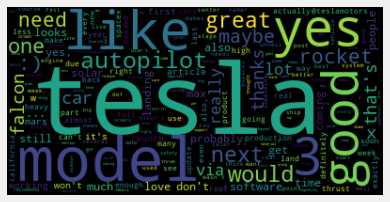

EM Word Frequency in 2017


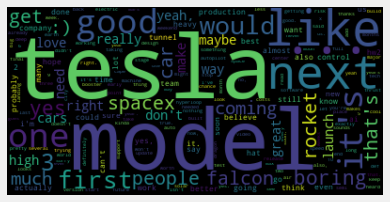

EM Word Frequency in 2018


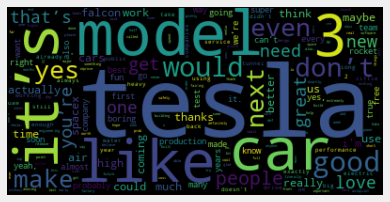

EM Word Frequency in 2019


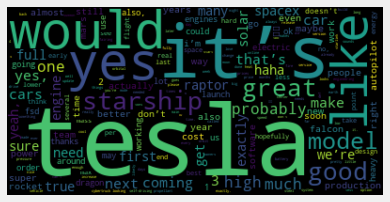

In [133]:
for year in range(2016, 2020):
    df_name = 'em_{}'.format(year)
    print("EM Word Frequency in {}".format(year))
    calc_and_display_wc(eval(df_name))
    


2016: Tesla, model, autopilot
2019: Starship


# Sentiment Analysis

In [134]:
from textblob import TextBlob

In [135]:
em_tweet['sentiment'] = em_tweet.just_text.apply(lambda text: TextBlob(text).sentiment[0])

C:\Users\vta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [136]:
em_tweet[['just_text', 'sentiment']]

,just_text,sentiment
0,"No, but we will need to build a factory in Europe to serve long-term regional demand as Fremont reaches max capacity.",0.00
1,True,0.35
2,Physics facts,0.00
3,Mostly true,0.35
4,"not bad, I like those suggestions",0.35
...,...,...
7013,https://t.co/WavNr0ZtDn,0.00
7014,The hardest joke ever,0.00
7015,Definitely,0.00
7016,"Personally, I think the universe looks great for 12 billion years, let alone 13.8",0.40


In [137]:
pysqldf("SELECT * FROM em_tweet;").head()

,id,created_at,favorite_count,favorited,retweet_count,full_text,text_start,text_stop,just_text,sentiment
0,716750313471025152,2016-04-03 22:12:45.000000,331,0,103,"@tapwin No, but we will need to build a factory in Europe to serve long-term regional demand as Fremont reaches max capacity.",0,125,"No, but we will need to build a factory in Europe to serve long-term regional demand as Fremont reaches max capacity.",0.00
1,1120839110564782080,2019-04-23 23:57:22.000000,4779,0,40,@flcnhvy @ItsMurphyOMG True,23,27,True,0.35
2,1188191951654309888,2019-10-26 20:33:31.000000,172847,0,22475,Physics facts https://t.co/Z2a6PzokJx,0,13,Physics facts,0.00
3,1091159895284449280,2019-02-01 02:22:46.000000,807,0,18,@wonderofscience @Treebeard1671 @Erdayastronaut @keego73 Mostly true,57,68,Mostly true,0.35
4,759413050961121280,2016-07-30 15:39:15.000000,215,0,8,"@voguemaster @Jalopnik not bad, I like those suggestions",23,56,"not bad, I like those suggestions",0.35


In [138]:
pysqldf("SELECT * FROM em_tweet WHERE sentiment >= 0.0 ORDER BY sentiment DESC;") # from very positive to neutral

,id,created_at,favorite_count,favorited,retweet_count,full_text,text_start,text_stop,just_text,sentiment
0,1116396609451872256,2019-04-11 17:44:27.000000,12025,0,511,@NASAGoddard @SpaceX .@SpaceX team would be so honored to fly this for @NASA!,21,77,.@SpaceX team would be so honored to fly this for @NASA!,1.00
1,984650810909851648,2018-04-13 04:33:41.000000,1423,0,66,@TEDTalks @audphin @i_firth Gwynne’s got it covered. She’s awesome.,28,67,Gwynne’s got it covered. She’s awesome.,1.00
2,1088861353140318208,2019-01-25 18:09:11.000000,4579,0,130,"@justinandgreg Yes, and my grandfather was from Minnesota with some Scandinavian/German background. Got to hand it to Norway. That’s a great sculpture!",15,151,"Yes, and my grandfather was from Minnesota with some Scandinavian/German background. Got to hand it to Norway. That’s a great sculpture!",1.00
3,1205622140852002816,2019-12-13 22:54:52.000000,1212,0,79,@ThugsAndMiracle @tfspeakcies @DearHistorians @DeepintoHistory @HellenisticPod @TrueConsPod @IWBpodcast @Coffincast @CacheHistory @AgeofVictoria @ForYourRefPod @WWIIPodcast @namelessdeadpod @ZombieFishbowl @AgeofNapoleon Age of Napoleon is excellent,221,249,Age of Napoleon is excellent,1.00
4,1011833857719451648,2018-06-27 04:49:25.000000,10476,0,437,You’re welcome! https://t.co/NcsGhhB1Ja,0,15,You’re welcome!,1.00
...,...,...,...,...,...,...,...,...,...,...
6058,1017965998392184832,2018-07-14 02:56:21.000000,682,0,21,@premkrmufc @iPugsieHD Hold up a mirror &amp; see if it fogs,23,60,Hold up a mirror &amp; see if it fogs,0.00
6059,993593145064673281,2018-05-07 20:47:20.000000,15313,0,1732,https://t.co/WavNr0ZtDn https://t.co/Z5w69RXtxu,0,23,https://t.co/WavNr0ZtDn,0.00
6060,1106296019606597632,2019-03-14 20:48:19.000000,4548,0,126,@thejmmonroe The hardest joke ever,13,34,The hardest joke ever,0.00
6061,999462420790755334,2018-05-24 01:29:44.000000,434,0,12,@TruthForceSteem @kali0x2a Definitely,27,37,Definitely,0.00


In [139]:
pysqldf("SELECT * FROM em_tweet WHERE sentiment < 0.0 ORDER BY sentiment;") # from neutral down to negative
# note that Boring might refer to The Boring Company or boring a hole
# For our purpose (a general view of Elon Musk tweets at large), this is fine.

,id,created_at,favorite_count,favorited,retweet_count,full_text,text_start,text_stop,just_text,sentiment
0,1182061315390492673,2019-10-09 22:32:33.000000,6178,0,392,Sooo annoying!! https://t.co/QKtCC0YgDG,0,39,Sooo annoying!! https://t.co/QKtCC0YgDG,-1.00
1,888053175155949572,2017-07-20 15:09:10.000000,189620,0,66720,Just received verbal govt approval for The Boring Company to build an underground NY-Phil-Balt-DC Hyperloop. NY-DC in 29 mins.,0,126,Just received verbal govt approval for The Boring Company to build an underground NY-Phil-Balt-DC Hyperloop. NY-DC in 29 mins.,-1.00
2,1075229709393252352,2018-12-19 03:21:54.000000,15934,0,946,All Boring Loops will include continuously circulating cars dedicated to pedestrians &amp; cyclists,0,99,All Boring Loops will include continuously circulating cars dedicated to pedestrians &amp; cyclists,-1.00
3,1117366774532460544,2019-04-14 09:59:33.000000,3685,0,162,@NCBirbhan @CBSNews Boring candy coming soon …,20,46,Boring candy coming soon …,-1.00
4,810126493326209025,2016-12-17 14:16:22.000000,15353,0,4046,"Boring, it's what we do",0,23,"Boring, it's what we do",-1.00
...,...,...,...,...,...,...,...,...,...,...
950,1014785289967923200,2018-07-05 08:17:21.000000,998,0,110,"@aperezposada @Reuters .@Reuters is relentlessly negative about Tesla. They just wrote a bogus article saying S production last week was low by 800 cars. S/X annual prod is set at ~100k, ie 1,900/week. Tesla built 1,913 S/X cars at our standard ~50/50 split last week, which is right on target.",23,294,".@Reuters is relentlessly negative about Tesla. They just wrote a bogus article saying S production last week was low by 800 cars. S/X annual prod is set at ~100k, ie 1,900/week. Tesla built 1,913 S/X cars at our standard ~50/50 split last week, which is right on target.",-0.00
951,1075232313082929154,2018-12-19 03:32:14.000000,24624,0,1559,"The demo ride takes you in *same* car on road, down elevator, zips through tunnel using guide wheels, up elevator at destination &amp; then drives on normal roads back to start",0,176,"The demo ride takes you in *same* car on road, down elevator, zips through tunnel using guide wheels, up elevator at destination &amp; then drives on normal roads back to start",-0.00
952,1134969070086836224,2019-06-01 23:44:47.000000,8060,0,178,"@vincent13031925 @Tesla We’re trying to simplify product complexity, so only offering white (technically black &amp; white) interior in high volume markets",24,155,"We’re trying to simplify product complexity, so only offering white (technically black &amp; white) interior in high volume markets",-0.00
953,1001253431493910528,2018-05-29 00:06:35.000000,722,0,19,@LikeTeslaKim Noted. We can prob adjust spring force &amp; catch to be less sensitive. Cupholders are amazingly hard to get right!,14,130,Noted. We can prob adjust spring force &amp; catch to be less sensitive. Cupholders are amazingly hard to get right!,-0.00


Text(0.5, 1.0, 'Sentiment Analysis - Full range of tweets')

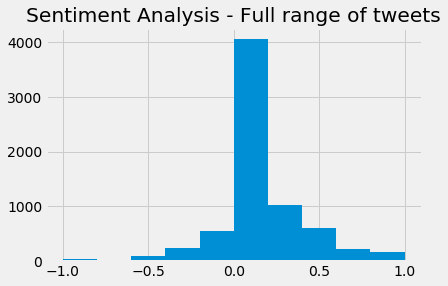

In [140]:
em_tweet.sentiment.hist()
plt.title("Sentiment Analysis - Full range of tweets")

Central tendency - Mean slightly right to the centre
=> Slightly more positive in general

EM tweets from 2016


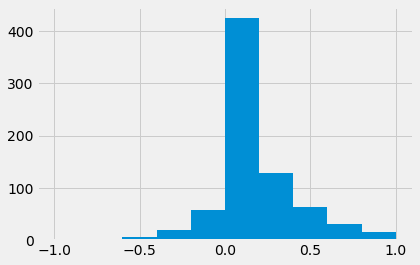

EM tweets from 2017


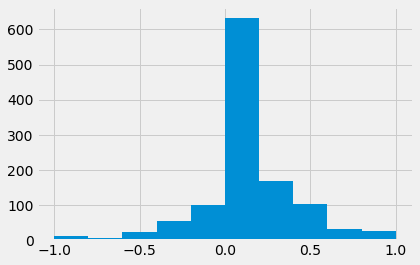

EM tweets from 2018


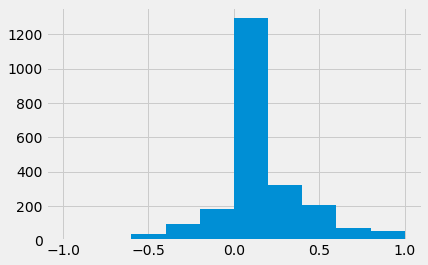

EM tweets from 2019


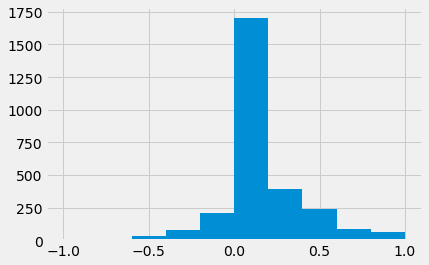

In [141]:
for year in range(2016, 2020):
    df_name = 'em_{}'.format(year)
    print("EM tweets from {}".format(year))
    eval(df_name)['sentiment'] = eval(df_name).just_text.apply(lambda text: TextBlob(text).sentiment[0])
    display(eval(df_name).sentiment.hist())
    plt.show()

In [142]:
# As we go through the years, there are more and more tweets
# Sentiment over 2016, 2017, 2018, 2019 consistently positive, with a slight shift towards the positive side over the year
# of the mean

Overall, EM has a positive general sentiment in his tweets for the time period 2016-2019. This can be attributed to the facts that:
- He's a visionary who's interested in innovation, creating new things in the future etc.
- Over time, the success and progress of his businesses, especially Tesla and SpaceX, has contributed more and more to the slight shift towards the more positive side


## Wrapping up - Some themes

In [143]:
# Example of using CountVectorizer to create a dictionary and decode a text based on the dictionary
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text = ["The quick brown fox jumped over the lazy dog.", "Oh my god, the the the", "brown cat sits behind window"]
matrix = vectorizer.fit_transform(text)
print(matrix.toarray())
vectorizer.get_feature_names()

[[0 1 0 1 1 0 1 1 0 0 1 1 0 2 0]
 [0 0 0 0 0 1 0 0 1 1 0 0 0 3 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 1 0 1]]


['behind',
 'brown',
 'cat',
 'dog',
 'fox',
 'god',
 'jumped',
 'lazy',
 'my',
 'oh',
 'over',
 'quick',
 'sits',
 'the',
 'window']

In [144]:
from sklearn.decomposition import NMF

em_tweet['text_no_sw'] = em_tweet.just_text.apply(lambda words: ' '.join([word.lower() for word in words.split() if word.lower() not in stopwords]))

C:\Users\vta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [145]:
# Create my bag of words, then my term-doc matrix (X)
bow = CountVectorizer()  # bag of words
X = bow.fit_transform(em_tweet.text_no_sw) # term-doc matrix

In [146]:
# Keep a human readable index to the terms
index2word = np.array(bow.get_feature_names())
print(index2word)

# Use non-negative matrix factorisation
nmf = NMF(n_components = 7, solver = 'mu') # Multiplicative Update most widely used
# n_components is the number of clusters we want to create
W = nmf.fit_transform(X)
H = nmf.components_
print(H)

['000' '01' '02' ... 'язык' '中南海紫光阁' '新世紀エヴァンゲリオン']
[[2.24828659e-002 1.18444583e-053 1.97741831e-042 ... 0.00000000e+000
  1.21371426e-039 4.11244337e-005]
 [5.07271099e-002 3.26202366e-006 8.33651883e-003 ... 0.00000000e+000
  3.84944238e-004 1.23271820e-021]
 [1.13526050e-001 4.25353037e-003 1.22712737e-002 ... 0.00000000e+000
  6.54825922e-004 8.07699410e-004]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  1.10252633e-009 3.97502167e-256]
 [1.65325039e-002 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


In [152]:
for i, topic in enumerate(H):
    print("Topic Cluster {}: {}".format(i + 1,','.join([term for term in index2word[topic.argsort()[-15:]]]))) # the 15 topics with the highest frequencies of mention by EM
    

Topic Cluster 1: roof,love,via,spacex,full,online,order,falcon,46txqrrsdr,launch,boring,solar,tesla,https,co
Topic Cluster 2: new,great,thanks,every,software,get,years,owners,service,us,year,team,cars,car,tesla
Topic Cluster 3: spacex,much,rocket,don,time,need,great,people,make,one,high,that,would,good,like
Topic Cluster 4: coming,version,first,end,new,drive,range,car,performance,cars,week,year,next,production,model
Topic Cluster 5: take,speed,lot,hopefully,improve,away,hardware,little,seats,complex,engineering,always,high,center,yes
Topic Cluster 6: say,still,want,years,believe,pretty,love,software,see,no,didn,car,don,know,it
Topic Cluster 7: thanks,sorry,ok,hope,glad,ve,ll,working,going,they,right,welcome,we,you,re


Topic 1: SpaceX, Falcon, launching of rockets, mostly about his space-related business
(This is expected since SpaceX has been making substantial breakthroughs in the space and solar industry in recent years)

Topic 2: Tesla, Tesla's software and cars product (still mainly business related)

Topic 3: Opinion and emotions expression about SpaceX and rockets to engage with his followers.

Topic 4: Self-driving cars and general updates about self-driving cars including release year, model, production updates

Topic 5: Tesla's engineering of products (more technical)

Topic 6: EM's hopes and aspirations, subjective opinions about Tesla's software and self-driving cars (the company's 2 most popular products)

Topic 7: Relationship buildings with potential stakeholders and interaction with followers for increasing engagement.